**Cleaning Tweets Pipeline**

This notebook takes the twitter files as inputs in the csv format, cleans the text column and does some EDA on the text and hashtag columns by building the wordcloud

**Input**: Twitter files in csv format

**Output**: Titter files in csv format with cleaned text column

#data factory

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing twitter data which are in 2 files

df1 = pd.read_csv('/dbfs/FileStore/consolidated.csv')
df2 = pd.read_csv('/dbfs/FileStore/consolidated2.csv')

/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,9,18,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)
/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,13,18,19,20,21,24,27,30,31,32,33,34,35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)

In [4]:
df1.shape

Out[142]: (233203, 40)

In [5]:
df2.shape

Out[143]: (284107, 39)

In [6]:
df.shape

Out[144]: (480308, 24)

In [7]:
df1.head()

,id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,matching_rules,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,scopes,source,text,truncated,country,region,user_id,hashtags
0,1217958999359918080,NaN,NaN,2020-01-16 23:57:08,NaN,"{'hashtags': [{'text': 'drones', 'indices': [1...",NaN,NaN,1.0,False,low,NaN,1.217959e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",With law enforcement cracking down on our use ...,False,NaN,NaN,4.650885e+09,drones
1,1217958805595738114,NaN,NaN,2020-01-16 23:56:22,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,NaN,1.217959e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,{'created_at': 'Thu Jan 16 21:15:03 +0000 2020...,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @MITREcorp: We’re researching ways to accel...,False,NaN,NaN,2.008772e+08,NaN
2,1217958020166094851,NaN,NaN,2020-01-16 23:53:15,NaN,"{'hashtags': [{'text': 'rpas', 'indices': [15,...",NaN,NaN,0.0,False,low,NaN,1.217958e+18,NaN,NaN,NaN,NaN,NaN,True,es,[{'tag': None}],NaN,NaN,0.0,{'created_at': 'Mon Jan 13 23:17:01 +0000 2020...,1.216862e+18,1.216862e+18,"{'url': 'https://t.co/Q2t13j6itk', 'expanded':...",0.0,0.0,False,{'created_at': 'Tue Jan 14 23:10:10 +0000 2020...,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @JVGKabala: #rpas @INAC_Venezuela continua ...,False,NaN,NaN,1.117841e+18,rpas
3,1217957457420570624,NaN,NaN,2020-01-16 23:51:01,NaN,"{'hashtags': [{'text': 'Drones', 'indices': [9...",NaN,"{'full_text': ""It's a bird! It's a plane! No i...",2.0,False,low,NaN,1.217957e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2.0,False,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",It's a bird! It's a plane! No it's @UPS and @C...,True,NaN,NaN,1.522160e+07,Drones
4,1217956259510525952,NaN,NaN,2020-01-16 23:46:15,"[0, 140]","{'hashtags': [{'text': 'Drones', 'indices': [0...",NaN,{'full_text': '#Drones and accessories visit o...,2.0,False,low,NaN,1.217956e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,NaN,"<a href=""https://fptraffic.com"" rel=""nofollow""...",#Drones and accessories visit our online store...,True,NaN,NaN,8.917302e+17,Drones


In [8]:
df2.head()

,id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,matching_rules,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,scopes,source,text,truncated,country,region,user_id,hashtags
0,1036402920856739845,NaN,"{'type': 'Point', 'coordinates': [110.366643, ...",2018-09-02 23:58:06,NaN,"{'hashtags': [{'text': 'dronestagram', 'indice...",NaN,{'full_text': 'The goal is to be rich not to l...,0.0,False,low,"{'type': 'Point', 'coordinates': [-7.799243, 1...",1.036403e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],"{'id': 'afde1810fc526ff2', 'url': 'https://api...",0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",The goal is to be rich not to look rich #drone...,True,ID,ID,4.574030e+09,dronestagram|drone|drones|dronefly|droneindone...
1,1036402062844682241,NaN,NaN,2018-09-02 23:54:41,"[0, 140]","{'hashtags': [{'text': 'dronephotography', 'in...",NaN,{'full_text': 'Aerial view of Marlowe Middle S...,1.0,False,low,NaN,1.036402e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",Aerial view of Marlowe Middle School.⠀\n*⠀\n*⠀...,True,NaN,NaN,1.087234e+08,dronephotography|dronelife|aerialphotography|a...
2,1036401144606744581,NaN,NaN,2018-09-02 23:51:02,"[0, 140]","{'hashtags': [{'text': 'gift', 'indices': [12,...",NaN,{'full_text': 'The perfect #gift for the #tech...,0.0,False,low,NaN,1.036401e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",The perfect #gift for the #tech lover!\n\n~DRO...,True,CA,CA,3.606128e+09,gift|tech|UAV
3,1036399242183553024,NaN,NaN,2018-09-02 23:43:29,"[0, 140]","{'hashtags': [{'text': 'experimental', 'indice...",NaN,"{'full_text': ""The most primitive drum machine...",2.0,False,low,NaN,1.036399e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","The most primitive drum machine I've used, and...",True,US,US,1.751692e+07,experimental|brutalist|beats
4,1036398905376813058,NaN,NaN,2018-09-02 23:42:09,NaN,"{'hashtags': [{'text': 'drone', 'indices': [94...",NaN,{'full_text': 'Add your drone business listing...,3.0,False,low,NaN,1.036399e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,"<a href=""https://www.socialoomph.com"" rel=""nof...",Add your drone business listing today to expan...,True,NaN,NaN,7.188834e+17,drone|manufacturer


In [10]:
#consolidating all the tweets in 1 dataframe

df = pd.concat([df1,df2])

/local_disk0/tmp/1587577358099-0/PythonShell.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

Let's take a glance on the tweets

In [12]:
#rough

df.index

Out[124]: Int64Index([ 0, 1, 2, 3, 4, 5, 6, 7,
 8, 9,
 ...
 284097, 284098, 284099, 284100, 284101, 284102, 284103, 284104,
 284105, 284106],
 dtype='int64', length=517310)

In [13]:
df.head()

,contributors,coordinates,country,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,hashtags,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,matching_rules,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,region,reply_count,retweet_count,retweeted,retweeted_status,scopes,source,text,truncated,user_id
0,NaN,NaN,NaN,2020-01-16 23:57:08,NaN,"{'hashtags': [{'text': 'drones', 'indices': [1...",NaN,NaN,1.0,False,low,NaN,drones,1217958999359918080,1.217959e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",With law enforcement cracking down on our use ...,False,4.650885e+09
1,NaN,NaN,NaN,2020-01-16 23:56:22,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,NaN,NaN,1217958805595738114,1.217959e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,{'created_at': 'Thu Jan 16 21:15:03 +0000 2020...,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @MITREcorp: We’re researching ways to accel...,False,2.008772e+08
2,NaN,NaN,NaN,2020-01-16 23:53:15,NaN,"{'hashtags': [{'text': 'rpas', 'indices': [15,...",NaN,NaN,0.0,False,low,NaN,rpas,1217958020166094851,1.217958e+18,NaN,NaN,NaN,NaN,NaN,True,es,[{'tag': None}],NaN,NaN,0.0,{'created_at': 'Mon Jan 13 23:17:01 +0000 2020...,1.216862e+18,1.216862e+18,"{'url': 'https://t.co/Q2t13j6itk', 'expanded':...",NaN,0.0,0.0,False,{'created_at': 'Tue Jan 14 23:10:10 +0000 2020...,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @JVGKabala: #rpas @INAC_Venezuela continua ...,False,1.117841e+18
3,NaN,NaN,NaN,2020-01-16 23:51:01,NaN,"{'hashtags': [{'text': 'Drones', 'indices': [9...",NaN,"{'full_text': ""It's a bird! It's a plane! No i...",2.0,False,low,NaN,Drones,1217957457420570624,1.217957e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,False,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",It's a bird! It's a plane! No it's @UPS and @C...,True,1.522160e+07
4,NaN,NaN,NaN,2020-01-16 23:46:15,"[0, 140]","{'hashtags': [{'text': 'Drones', 'indices': [0...",NaN,{'full_text': '#Drones and accessories visit o...,2.0,False,low,NaN,Drones,1217956259510525952,1.217956e+18,NaN,NaN,NaN,NaN,NaN,False,en,[{'tag': None}],NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,NaN,"<a href=""https://fptraffic.com"" rel=""nofollow""...",#Drones and accessories visit our online store...,True,8.917302e+17


In [14]:
#rough

df['text']

Out[126]: 0 With law enforcement cracking down on our use ...
1 RT @MITREcorp: We’re researching ways to accel...
2 RT @JVGKabala: #rpas @INAC_Venezuela continua ...
3 It's a bird! It's a plane! No it's @UPS and @C...
4 #Drones and accessories visit our online store...
5 RT @excel_drones: Time flies when you’re flyin...
6 RT @bureau_web: Welcome @AerialMediaPros to th...
7 Another Win for Altitude Angel: Unmanned Traff...
8 RT @FhP_AICOS: In this week’s Thursdays with S...
9 Time flies when you’re flying.\n\n📸\n@asdetroi...
10 The latest Quadcopter Daily News .com! https:/...
11 RT @foxfuryLED: Introducing the D3060 - a smal...
12 RT @PawlowskiMario: This #drone can follow and...
13 #Australia should get some Dutch &amp; America...
14 RT @GBPartners_bj: We are proud @GBPartners_bj...
15 RT @MikeQuindazzi: The global #Drone market is...
16 RT @jblefevre60: This Audi Self-driving is equ...
17 RT @Xbond49: These tiny #drones are seriously ...
18 RT @PawlowskiMario: This #drone can follow and...
19 ¿Que pasaría si pusieras un dron en funcionami...
20 FAA Warns Super Bowl LIV is a No Drone Zone ht...
21 RT @MikeQuindazzi: #IIoT is fueling things fro...
22 RT @JPCarter47: BIOPRINTS\n"...Cutting edge te...
23 RT @HaroldSinnott: #CES2020: Thriving on the B...
24 🦅 ANKA - DECISIONES INTELIGENTES\n📱3164493165\...
25 RT @THEAdamGabriel: #RT @MikeQuindazzi: RT @Pa...
26 RT @MyCafu: Using drones to plant one million ...
27 IAM Platform Curated Tweet:\n\nEngineers are d...
28 RT @MAETL_News: #maetl members learning about ...
29 RT @jblefevre60: This Audi Self-driving is equ...
 ... 
284077 Drones May Now Save Your Life https://t.co/lP7...
284078 Drones Carrying Defibrillators Could Aid Heart...
284079 The sky’s the limit for our #ManciniDuffyDesig...
284080 These Six Luxury Underwater Drones Are Disrupt...
284081 Exciting times! Drones, A.I., mobile apps and ...
284082 eBay: Airhogs RC Hyper Stunt Drone. NEW https:...
284083 The Grocery Store Of The Future Is Mobile, Sel...
284084 Wow! Spark, Mavic and Phantom teardown #drone ...
284085 DJI Spark w/ Remote Controller — Sport Mode is...
284086 Definitely going to be buying a sweet drones D...
284087 China gets a dose of the sharing economy with ...
284088 Gassing up on the way to Seattle WA on the #gr...
284089 @_NLilley predicts widespread use of drone def...
284090 To combat blazes, LA fire proposes drone progr...
284091 Posted by : @ Inc #Startup #Business #Digital ...
284092 How to Interpret Drone Footage for Slow Motion...
284093 Future! #holograms #research RT @guardian_spor...
284094 How old do you have to be to fly a drone? We a...
284095 .@Google asks #FCC for bandwidth to test its f...
284096 ℅ #Inc⛹ The most exciting drones aren't in the...
284097 GrabCAD Community Platform 3D Printed Drone Co...
284098 Drones give North Dakota farmers a new tool to...
284099 While r gov is wasting time chasing Russians, ...
284100 The most exciting drones aren't in the air--th...
284101 #Drones for #RealEstate #Marketing Gives a Uni...
284102 @teabee53 @LornaIrish @cummins_alan @DaysinIta...
284103 eBay: EACHINE E10C RC Mini Quadcopter Drone Wi...
284104 These Six Luxury Underwater Drones Are Disrupt...
284105 Tenants in #London highrise fire begged for he...
284106 Tenants in #London highrise fire begged for he...
Name: text, Length: 517310, dtype: object

In [15]:
#rough

df['text'].nunique()

Out[127]: 438409

In [16]:
#returns % of missing data in each column ( EDA )

def missingData(dataframe):
  
    """ 
         Summary: 
         Summerizing Missing values count
       
         Parameters: 
         Complete Dataframe
         
         Returns:
         Missing value count for all the columns 
    """

    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = (dataframe.isnull().sum()*100/dataframe.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data['Percent']=missing_data['Percent'].astype('str') + '%'
    return missing_data

In [17]:
#uses the above function and prints the missing data %

missingData(df)

,Total,Percent
contributors,517286,99.99536061549168%
scopes,517053,99.9503199242234%
retweeted_status,514343,99.42645609015871%
geo,513667,99.2957800931743%
coordinates,513656,99.29365370860799%
place,502963,97.22661460246275%
quoted_status_permalink,497135,96.1000173976919%
quoted_status,497135,96.1000173976919%
in_reply_to_status_id,496984,96.07082793682704%
in_reply_to_status_id_str,496984,96.07082793682704%


In [18]:
#drops missing data function ( EDA )

def dropMissingColumns(dataFrame, dropCutOff=80):
  
  """ 
         Summary: 
         Drop's Columns if percentage of missing is greater than dropCutOff (default parameter given as 80) percent.
       
         Parameters: 
         Complete Dataframe, optional parameter - dropCutOff
         
         Returns:
         Dataframe after dropping
  """
    
  missingData = (dataFrame.isnull().sum()/len(dataFrame)) * 100
  missingFeatures = missingData[missingData > dropCutOff].index
  print(str(missingFeatures))
  print( 'these columns had been dropped')
  dataFrame.drop(missingFeatures, axis=1, inplace = True)
  return dataFrame

In [19]:
df = dropMissingColumns(df)

Index(['contributors', 'coordinates', 'extended_entities', 'geo',
 'in_reply_to_screen_name', 'in_reply_to_status_id',
 'in_reply_to_status_id_str', 'in_reply_to_user_id',
 'in_reply_to_user_id_str', 'place', 'quoted_status', 'quoted_status_id',
 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted_status',
 'scopes'],
 dtype='object')
these columns had been dropped

In [21]:
df.index

Out[132]: Int64Index([ 0, 1, 2, 3, 4, 5, 6, 7,
 8, 9,
 ...
 284097, 284098, 284099, 284100, 284101, 284102, 284103, 284104,
 284105, 284106],
 dtype='int64', length=517310)

In [22]:
#rough


df['text'].nunique()

Out[133]: 438409

In [24]:
sum((df['text'].isnull()) & (df['extended_tweet'].isnull()))

Out[134]: 37002

In [25]:
def dropNA(dataFrame, targetColumn):
  """ 
         Summary: 
         Drop's complete observation(s) if targetColumn is Null.
       
         Parameters: 
         Complete Dataframe & targetColumn
         
         Returns:
         Dataframe after dropping
  """
  dataFrame = dataFrame.dropna(subset=[targetColumn])
  return dataFrame

In [26]:
df = dropNA(df, 'text')

In [27]:
df.index

Out[137]: Int64Index([ 0, 1, 2, 3, 4, 5, 6, 7,
 8, 9,
 ...
 284097, 284098, 284099, 284100, 284101, 284102, 284103, 284104,
 284105, 284106],
 dtype='int64', length=480308)

In [28]:
missingData(df)

,Total,Percent
display_text_range,288982,60.1659768315331%
country,267120,55.61431414842143%
region,267120,55.61431414842143%
extended_tweet,235483,49.02749902146123%
hashtags,118717,24.716848355638465%
possibly_sensitive,48040,10.00191543759421%
truncated,24632,5.128375958759796%
user_id,24632,5.128375958759796%
quote_count,0,0.0%
reply_count,0,0.0%


In [29]:
#Values count function to get number of observations tagged with perticular value in target column

def valuesCount(dataFrame, targetColumn):
  
  """ 
         Summary: 
         To segregate targetColumn and give the count of each segregation.
       
         Parameters: 
         Complete Dataframe & targetColumn
         
         Returns:
         Group and its count for targetColumn
  """
    
  values = dataFrame[targetColumn].value_counts()
  return values

In [30]:
#rough

df['text'].nunique()

Out[55]: 438409

In [31]:
print(valuesCount(df, 'lang'))

en 478790
es 619
fr 348
de 77
nl 68
und 63
in 54
pt 53
tl 43
da 41
it 30
no 23
et 20
ht 13
pl 11
cy 10
ca 9
sv 9
lv 6
tr 4
eu 4
lt 3
ro 2
sl 2
zh 2
vi 1
el 1
te 1
is 1
Name: lang, dtype: int64

In [32]:
df.head()

,country,created_at,display_text_range,entities,extended_tweet,favorite_count,favorited,filter_level,hashtags,id,id_str,is_quote_status,lang,matching_rules,possibly_sensitive,quote_count,region,reply_count,retweet_count,retweeted,source,text,truncated,user_id
0,NaN,2020-01-16 23:57:08,NaN,"{'hashtags': [{'text': 'drones', 'indices': [1...",NaN,1.0,False,low,drones,1217958999359918080,1.217959e+18,False,en,[{'tag': None}],NaN,0.0,NaN,0.0,0.0,False,"<a href=""http://twitter.com/download/iphone"" r...",With law enforcement cracking down on our use ...,False,4.650885e+09
1,NaN,2020-01-16 23:56:22,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,0.0,False,low,NaN,1217958805595738114,1.217959e+18,False,en,[{'tag': None}],NaN,0.0,NaN,0.0,0.0,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @MITREcorp: We’re researching ways to accel...,False,2.008772e+08
2,NaN,2020-01-16 23:53:15,NaN,"{'hashtags': [{'text': 'rpas', 'indices': [15,...",NaN,0.0,False,low,rpas,1217958020166094851,1.217958e+18,True,es,[{'tag': None}],NaN,0.0,NaN,0.0,0.0,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @JVGKabala: #rpas @INAC_Venezuela continua ...,False,1.117841e+18
3,NaN,2020-01-16 23:51:01,NaN,"{'hashtags': [{'text': 'Drones', 'indices': [9...","{'full_text': ""It's a bird! It's a plane! No i...",2.0,False,low,Drones,1217957457420570624,1.217957e+18,False,en,[{'tag': None}],0.0,0.0,NaN,0.0,2.0,False,"<a href=""https://about.twitter.com/products/tw...",It's a bird! It's a plane! No it's @UPS and @C...,True,1.522160e+07
4,NaN,2020-01-16 23:46:15,"[0, 140]","{'hashtags': [{'text': 'Drones', 'indices': [0...",{'full_text': '#Drones and accessories visit o...,2.0,False,low,Drones,1217956259510525952,1.217956e+18,False,en,[{'tag': None}],0.0,0.0,NaN,0.0,0.0,False,"<a href=""https://fptraffic.com"" rel=""nofollow""...",#Drones and accessories visit our online store...,True,8.917302e+17


In [33]:
df = df.drop(df[df.lang != 'en'].index)

In [34]:
df['possibly_sensitive'].value_counts()

Out[59]: 0.0 427967
1.0 2018
Name: possibly_sensitive, dtype: int64

In [35]:
df = df.drop(df[df.possibly_sensitive == 1].index)

In [36]:
df.shape

Out[61]: (473770, 24)

In [37]:
#rough

df['text'].nunique()

Out[62]: 432487

In [38]:
df['text'].value_counts()

Out[63]: Parrot’s Mambo FPV puts you in the mini cockpit #drones 12908
@SkySports commentator drones on and on about something or other whilst action builds on pitch. 7375
Parrot's latest drones are for farmers and firefighters 4166
#Questions PastPresentFuture in 1 site:US supplied F16s R for #war #Drones R for #terrorists https://t.co/vBW3xUM3di https://t.co/RjqP3mhxoA 194
How to Make Money Using Drones - A Guide https://t.co/xcQJmxEZHg #makemoneyonline 189
#Stayinformed #technology DJI is reshaping the world with their fleet of awesome drones and goggles https://t.co/VcEbV0qEfr 172
How Wingtra Drone Works to Collect High Resolution Data #drones #geospatial #lidar #map #uav https://t.co/HfmL86Lmr3 88
The latest Drone News Daily! https://t.co/yMBsqDYYY9 | #drones #dronenews #uav #droneracing #dronenr #IoT #technology #ai #fpv #news #drone 83
Afraid of a drone hitting your plane? Expert says a drone won't bring down a plane https://t.co/513lt9cp2h #travel https://t.co/yJqD9VVmwv 76
#Tattu #1800mAh 45C 3S1P LiPo Battery Pack for Racing Drones https://t.co/2DY85mic3y 75
This is why hydrogen gas may be the ideal fuel for cargo drones. #futurist https://t.co/6kObMfLs10 https://t.co/u9ab2t1Lm9 73
Free and Open-Source Drone Projects #drones #lidar #opensource #uav https://t.co/8QY6bkMrUV 72
Where to Download Free Satellite and Drone Imagery #drones #gis #opendata #opengov #space #uav https://t.co/r66Y1AhkLC 72
Get to know us a bit, add your drone business user profile free, explore site :-) https://t.co/x0JSDoVywz #drones #unmanned #business 70
Gas-sensing drones can measure air pollution. #futurist https://t.co/ldl0a0Ui4e https://t.co/9BHG6ZmJoA 69
RT @harvingtonTR: Shanghai using drones instead of fireworks for New Year’s Eve..brilliant\nCompletely animal friendly\n#Fireworks #drones #S… 68
WeTalkUAV aims to provide the most accurate and comprehensive drone reviews https://t.co/Agkv5xuOB9 #drones #uav 67
RT @evankirstel: 2020 is the year drones get to work! #Enterprise #Drones #DroneEconomy #Business #CES2020 https://t.co/Ztdin4VIw4 65
#Stayinformed #technology DJI is reshaping the world with their fleet of awesome drones and goggles https://t.co/Lis5PvjUZy 64
My Drone Choice - news &amp; reviews of consumer drones &amp; quadcopters https://t.co/2JlHgYYjSr #drones #uav #quadcopters #rc #reviews #blog 55
#Tattu #1800mAh 45C 3S1P LiPo Battery Pack for Racing Drones https://t.co/rN3g5Xjfzh 55
UPS now deploying drones for routine medical deliveries. #futurist https://t.co/mcNydmxUYU https://t.co/7x30lNcABj 53
Bold Aerial Drone Photography Business Card https://t.co/7J3z4gWaQc #dronephotography #drones #aerial #marketing https://t.co/XBLhKsuVaB 53
Reducing Wildfires with #IoT, #ML, and Drones https://t.co/HUTljtO0Fq #Wildfire @DellOEM 52
#thriller #suspense #books kindle\n⭐⭐⭐⭐⭐\nCLONE DRONES\n@rcarter67606\nhttps://t.co/NPqG7SjBQW https://t.co/WSHpHWqpbz 49
* #thriller #suspense #ASMSG\n⭐⭐⭐⭐⭐\nCLONE DRONES\n@rcarter67606\nhttps://t.co/NPqG7SjBQW https://t.co/WSHpHWqpbz 49
https://t.co/3jVRCNiKFK #Drones,toys,droneswithvideo, 49
How to Make Money Using Drones - A Guide https://t.co/1qYyEbaGRV #makemoneyonline 47
RT @JPCarter47: BIOPRINTS\n"...Cutting edge technology meets classic detective fiction..."\nhttps://t.co/iHcwyLVEPh \n#IARTG #Kindle #Amazon #… 47
#NowPlaying on #2HighRadio Drones by Unknown on . #420music #hiphop #drumnbass #reggae #submityourmusic #2highmusic 47
 ... 
#ootd #beauty DJI Spark /Spark Fly More Combo drone 1080P HD video recording 12MP Camera drones original in stock… https://t.co/j7NY4fFfPD 1
"Drone swarm technology could have a significant impact on every area of military competition, from enhancing suppl… https://t.co/iEhJXDMG25 1
CNN just got special FAA permission to fly #drones over crowds https://t.co/92Th2HkDuM #archive #drone #news 1
@netflix Is it Battle Drone or Battle of the Drones? Whatever the right title entertaining action + premise + hilar… https://t.co/PppOeeal9S 1
DJI Phantom 3 Standard Drone w

There are few rows whose text from the text column is continued in the extended text column due to twitter policies. Now, we will impute the text column by bringing in the extended text from the extended text column to the text column thereby getting all the data

In [40]:
def imputeExtended(dataFrame, columns, masterColumn, subColumn, indicatorColumn):
  
    """ 
         Summary: 
         Imputing values from masterColumn to subColumn when indicatorColumn is True
       
         Parameters: 
         Complete Dataframe, masterColumn - where we can import from, subColumn - to be imported, indicatorColumn - indicates if we can extract              data from Master Column
         
         Returns:
         Dataframe after imputation
    """
    reduced = dataFrame[columns].copy()
    extended_to_use_original = reduced[masterColumn][reduced[indicatorColumn]==True]
    extended_to_use = reduced[masterColumn][reduced[indicatorColumn]==True]
    extended_to_use = [ast.literal_eval(extended_to_usei) for extended_to_usei in extended_to_use]
    extended_to_use = [full['full_text'] for full in extended_to_use]
    dataFrame.text.iloc[extended_to_use_original.index] =  extended_to_use
    
    return dataFrame


In [41]:
import ast
 
columns = ['text', 'extended_tweet', 'truncated']
df = imputeExtended(df, columns, 'extended_tweet', 'text', 'truncated' )

In [42]:
df['text']

Out[66]: 0 The goal is to be rich not to look rich #drone...
1 Aerial view of Marlowe Middle School.⠀\n*⠀\n*⠀...
3 It's a bird! It's a plane! No it's @UPS and @C...
4 The most primitive drum machine I've used, and...
5 Add your drone business listing today to expan...
6 Drones are taking off with a better user exper...
7 This fool @djominaya is annoying!! 😂😂 ..They g...
8 mt @Fisher85M\n\n106 #Startups Transforming #H...
9 With so many things that can go wrong with ope...
10 UA Systems Ltd - Hawaii based aerial photograp...
11 US Government to Authorize Drone Strikes on US...
12 How To Make A Drone With Camera – FPV Racing Q...
13 #Australia should get some Dutch &amp; America...
14 How various industries are taking advantage of...
15 The future of warehouses are going, going and ...
16 Alabama drone pilot airs it out for ESPN’s Col...
17 RT @Xbond49: These tiny #drones are seriously ...
18 https://t.co/bRX1RJw6Gb Let's take a trip toge...
20 Super excited for Clash &amp; Maverick in #Ope...
21 RT @MikeQuindazzi: #IIoT is fueling things fro...
22 RT @JPCarter47: BIOPRINTS\n"...Cutting edge te...
23 Kids racing #drones for $$$\n\nThe total prize...
25 #hashtag2 RC Drones with hd Camera RC Helicopt...
26 Drones and Textile Evidence \n\n'An investigat...
27 IAM Platform Curated Tweet:\n\nEngineers are d...
28 Had a great time learning today from celebrity...
29 #bridgehampton #djimavic2pro #laborday #poolp...
30 IAM Platform Curated Tweet:\n\nEngineers are d...
31 Idaho researchers work to show promise of #dro...
32 Like and share if you think it`s fantastic!\n\...
 ... 
284076 Drones May Now Save Your Life https://t.co/lP7...
284077 Drones May Now Save Your Life https://t.co/lP7...
284078 Drones Carrying Defibrillators Could Aid Heart...
284079 The sky’s the limit for our #ManciniDuffyDesig...
284080 These Six Luxury Underwater Drones Are Disrupt...
284081 Exciting times! Drones, A.I., mobile apps and ...
284082 eBay: Airhogs RC Hyper Stunt Drone. NEW https:...
284083 The Grocery Store Of The Future Is Mobile, Sel...
284084 Wow! Spark, Mavic and Phantom teardown #drone ...
284085 DJI Spark w/ Remote Controller — Sport Mode is...
284086 Definitely going to be buying a sweet drones D...
284087 China gets a dose of the sharing economy with ...
284088 Gassing up on the way to Seattle WA on the #gr...
284089 @_NLilley predicts widespread use of drone def...
284091 Posted by : @ Inc #Startup #Business #Digital ...
284092 How to Interpret Drone Footage for Slow Motion...
284093 Future! #holograms #research RT @guardian_spor...
284094 How old do you have to be to fly a drone? We a...
284095 .@Google asks #FCC for bandwidth to test its f...
284096 ℅ #Inc⛹ The most exciting drones aren't in the...
284097 GrabCAD Community Platform 3D Printed Drone Co...
284098 Drones give North Dakota farmers a new tool to...
284099 While r gov is wasting time chasing Russians, ...
284100 The most exciting drones aren't in the air--th...
284101 #Drones for #RealEstate #Marketing Gives a Uni...
284102 @teabee53 @LornaIrish @cummins_alan @DaysinIta...
284103 eBay: EACHINE E10C RC Mini Quadcopter Drone Wi...
284104 These Six Luxury Underwater Drones Are Disrupt...
284105 Tenants in #London highrise fire begged for he...
284106 Tenants in #London highrise fire begged for he...
Name: text, Length: 473770, dtype: object

In [43]:
#rough

df['text'].nunique()

Out[67]: 430444

In [44]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [45]:
pip install python-Levenshtein

%pip install python-Levenshtein is not supported in Databricks notebooks.
 To modify the environment on driver only, you can use %sh. To modify the environment on driver and executors use library utilities. Run dbutils.library.help() for documentation on Databricks library utilities.

**Now, let us create a cleaning function. We will remove all the non-alphanumeric texts like punctuations etc. We will also remove the tags using beautiful soup and expand the shortened words like isn't into is not.**

In [47]:
#rough


df_copy = df.copy()

In [48]:
#cleaning function

def textCleaning(text):
    """ 
         Summary: 
         Clean text data by removing http/www links, alphanumerics etc, making text in lowercase and removing leading and tailing white spaces.
       
         Parameters: 
         text (is passed in a loop), this function requires a series of input, hence this requires a loop (created in the next cell).
         
         Returns:
         Cleaned text
    """
    
    
    filters = r'@[A-Za-z0-9_]+|https?://[^ ]+|www.[^ ]+'

    # Creating a dictionary for unshortten words
    my_dictionary = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "rt":''}

    myDictionary_pattern = re.compile(r'\b(' + '|'.join(my_dictionary.keys()) + r')\b')
  
    text = str(text)
    
    #Beautiful Soup is a Python package for parsing HTML and XML documents.
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
        
    #Filtering with our customized filter that we created
    stripped = re.sub(filters, '', bom_removed)
    lower_case = stripped.lower()
    dictionary_handled = myDictionary_pattern.sub(lambda x: my_dictionary[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", dictionary_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
    return (" ".join(words)).strip()

In [49]:
sak = ['i asm dahs good boy BUT not a hbs jasjkd,;//da~!!@!', 'uhsdsd UUYFCv  ;fio[q][poiojw hsddjdhj jajDDDWw','sasRds dsfa@MAID.COM JJHBGHASA HJSAHAVENT JDASNH JJKSAK', 'NJFHAJ JSHHDBA RAOJF WHWDHBDYQHJ NAASHJBDJAS']


In [50]:
saket = pd.DataFrame(sak)
saket.head()
saket.columns = ['text']

In [51]:
saket

,text
0,"i asm dahs good boy BUT not a hbs jasjkd,;//da..."
1,uhsdsd UUYFCv ;fio[q][poiojw hsddjdhj jajDDDWw
2,sasRds dsfa@MAID.COM JJHBGHASA HJSAHAVENT JDAS...
3,NJFHAJ JSHHDBA RAOJF WHWDHBDYQHJ NAASHJBDJAS


In [52]:
#rough


#running the above cleaning function

nums = saket.shape[0]
print ("Cleaning and parsing the tweets...\n")

#creating empty list
saket_clean = []

#Passing texts of our dataframe in loop
for i in range(nums):
    if((i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums ))   
        
        #collecting cleaned text in a list
    saket_clean.append(textCleaning(saket['text'].iloc[i]))
print('Pro-processing done 👍🏼')

Cleaning and parsing the tweets...

Pro-processing done 👍🏼

In [53]:
#rough

# Passing cleaned text from list to original dataframe
saket['text'] = pd.DataFrame(saket_clean,columns=['text'])
saket['text'].head(20)

Out[113]: 0 asm dahs good boy but not hbs jasjkd da
1 uhsdsd uuyfcv fio poiojw hsddjdhj jajdddww
2 sasrds dsfa com jjhbghasa hjsahavent jdasnh jj...
3 njfhaj jshhdba raojf whwdhbdyqhj naashjbdjas
Name: text, dtype: object

In [55]:
#rough


#running the above cleaning function

nums = df_copy.shape[0]
print ("Cleaning and parsing the tweets...\n")

#creating empty list
clean_tweet_texts = []

#Passing texts of our dataframe in loop
for i in range(nums):
    if((i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums ))   
        
        #collecting cleaned text in a list
    clean_tweet_texts.append(textCleaning(df_copy['text'].iloc[i]))
print('Pro-processing done 👍🏼')

Cleaning and parsing the tweets...

Tweets 100000 of 473770 has been processed
/databricks/python/lib/python3.6/site-packages/bs4/__init__.py:398: UserWarning: "https://t.co/p1bWMfzGL2
#PARTNERSINDUSTRY#PARTNERS#INDUSTRY#EDITION#MAGAZINE#PARTENAIRES#AGENCE#DIGITALE#NUMERIQUE#AGENCEDIGITALEPARIS#AGENCENUMERIQUEPARIS#WEBSHOPRODUCT#SMO#SEO#NETWORK#DESIGNGRAPHIC#WWW.partnersindustry.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
 markup
Tweets 200000 of 473770 has been processed
Tweets 300000 of 473770 has been processed
/databricks/python/lib/python3.6/site-packages/bs4/__init__.py:398: UserWarning: "https://t.co/bQGz04dytl
#agtech#drones" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
 markup
Tweets 400000 of 473770 has been processed
Pro-processing done 👍🏼

In [56]:
clean_tweet_texts

Out[98]: ['the goal is to be rich not to look rich dronestagram drone drones dronefly droneindonesia djiphantomindonesia dji djiosmo djimavicpro djindonesia djimavic photography',
 'aerial view of marlowe middle school dronephotography dronelife aerialphotography aerial drones dronestagram quadcopter dronegear gopro lrmobile drsolo dronelife skyhilife droneoftheday dronesdaily quadcopter dronegear',
 'it bird it plane no it and delivering prescriptions right to your door with drones now th',
 'the most primitive drum machine ve used and aggro drones to go along with it experimental brutalist beats analogue',
 'add your drone business listing today to expand your online reach drone manufacturer droneservices drones retail dronepilots iot aerialsurvey aerialphotography inspection mapping precisionag mktg business marketing',
 'drones are taking off with better user experience now pilots can simultaneously see crucial telemetry data augmented flight tools and real time video feeds all while remaining within line of site of their drone userexperien',
 'this fool is annoying they got them drones flying around at the nystatefair syracuse the great new york state fair',
 'mt startups transforming healthcare ai ai ml insurtech fintech healtcare cybersecurity vr iot iiot drones ir',
 'with so many things that can go wrong with operating drones next to airports faa requires controllers to notify when flying within mile zone',
 'ua systems ltd hawaii based aerial photography videography geospatial mapping cinema aerial filming services using different uav airframes aerialvideo cinematography uav uas drone drones gis aerialsurvey mapping hawaii nz usa',
 'us government to authorize drone strikes on us soil drones that fire ammo at dissenters after they locate you by triangulation with your cellphone stopthenwo',
 'how to make drone with camera fpv racing quadcopter drone racing drone at home how to make drone how to make drone at home how to make drone with camera how to make qua how to make quadcopter at home very easy dronestagram drones',
 'australia should get some dutch american submarines on discount and fire extinguisher drones',
 'how various industries are taking advantage of drones to increase efficiency and cut costs unable to retrieve full text content in new report business insider intelligence details how drones are disrupting slew of differen data iot news',
 'the future of warehouses are going going and going up higher than ever before the newest patent for warehouse with amazon deals with drones and new futuristic look amazonwarehouse',
 'alabama drone pilot airs it out for espn college gameday yellowhammer news film filmmaking dronestagram dailydrone dronevideo drone dronephotography dronephotographer uav uas aerialphotography eagle drones us',
 'these tiny drones are seriously impressive by innovation tech robotics automation mobile',
 'let take trip together boat boats yacht gulfofmexico florida hashtagflorida exploreflorida vacationflorida paradise beachlakepool drone drones dronephotography droneoftheday dronelife dronexyz dronegear twenty se',
 'super excited for clash maverick in operationgrimsky in after reviewing tts info wish clash did not have to drop shield to destroy drones perhaps allow for drone kills if under reticle re maverick could maybe have fuel fuel usage adjustment',
 'iiot is fueling things from drones to autonomousvehicles pwc via robotics industry iot',
 'bioprints cutting edge technology meets classic detective fiction iartg kindle amazon',
 'kids racing drones for the total prize purse at the world drone prix in dubai was year old teenager ended up winning first place the best way to understand droneracing is to learn to build your own drone first build drone winnipeg october',
 'hashtag rc drones with hd camera rc helicopter foldable mini drone fpv quadcopter aircraft selfie drone foldable drone gw jy jd',
 'drones and textile evidence an investigation into the effect of surveillance drones on

In [57]:
#rough

# Passing cleaned text from list to original dataframe
df_copy['text'] = pd.DataFrame(clean_tweet_texts,columns=['text'])
df_copy['text'].head(20)

Out[73]: 0 the goal is to be rich not to look rich drones...
1 aerial view of marlowe middle school dronephot...
3 the most primitive drum machine ve used and ag...
4 add your drone business listing today to expan...
5 drones are taking off with better user experie...
6 this fool is annoying they got them drones fly...
7 mt startups transforming healthcare ai ai ml i...
8 with so many things that can go wrong with ope...
9 ua systems ltd hawaii based aerial photography...
10 us government to authorize drone strikes on us...
11 how to make drone with camera fpv racing quadc...
12 australia should get some dutch american subma...
13 how various industries are taking advantage of...
14 the future of warehouses are going going and g...
15 alabama drone pilot airs it out for espn colle...
16 these tiny drones are seriously impressive by ...
17 let take trip together boat boats yacht gulfof...
18 super excited for clash maverick in operationg...
20 bioprints cutting edge technology meets classi...
21 kids racing drones for the total prize purse a...
Name: text, dtype: object

In [58]:
#rough


df_copy['text'].nunique()

df_copy['text'].value_counts()

Out[74]: lenovo is giving away instant win prizes like smart bulbs nest thermostats drones more sweepstakes instantwin backtoschoolready 3096
alan watch the skies animation art movies stopmotionanimation stopmotion shortfilm shortfilms animated superstar moviereview movie artist drones dronedelivery 1104
lenovo is giving away instant win prizes like smart bulbs nest thermostats drones more sweepstakes 918
create your own star wars adventure with collectible drone from enter to win on mommymoment daysofgifts can us 860
super offer drones and accessories visit take breathtaking videos with this drone pro best seller dronexpro 792
things are taking off in mega giveaway entered to win an air hogs dr fpv race drone have you gadgets drones toys giftideas 774
drones and accessories visit our online store where you will find all types of professional drones drone camara 432
ladygaga this show had everything from flying drones and poker face to piano solo and dramatic jump off the roof this show rivaled the excitement of the game 382
dji announces mavic smart controller with built in screen learn more here today mavic drone drones djimavic mavic 330
alan watch the skies animation art movies stopmotionanimation stopmotion shortfilm 302
 295
ua systems ltd hawaii based aerial photography videography geospatial mapping cinema aerial filming services using different uav airframes aerialvideo cinematography uav uas drone drones gis aerialsurvey mapping hawaii nz usa 276
amazon reviewer katie said it stuck with me while this one if you like movies like inception or the matrix you ll love this book lenders by is available at scifi ai drones robots 272
super offer drones and accessories visit take breathtaking videos with this drone 264
dreaming as an occupation but it no picnic lenders by by best book ve read in stars on point scale yes know cheated you read it and tell me wrong lenders scifi ai drones robots 251
amazon reviewer larry johnson said by the end of the novel it had me believing in some astounding possibilities lenders by is available at scifi ai drones robots 250
the book is awesome well written and easy to understand amreading waypoint game of drones 240
drones have now become one of the most popular connected objects worldwide and it is not difficult to understand why retweet please drones dronephotography 231
ebay gear play children toy rc drone flying in outdoor smart with camera tr drones uav uas 212
this book is great entertainment after stressful day at work read waypoint game of drones 206
checkitout drones the ultimate guide on our blog at or buyitnow on amazon at photography video aerial hobbies reference drones howto arielphotography bestreads topreads ebooks bookrecommendations featured 206
love drones check this deal 204
ebay gear play drone condor quadcopter kid remote control toy helicopter blue tr drones uav uas 196
tattu mah lipo battery pack for racing drones 192
it coming get ready for the ultimate learning experience cornerstonedrone join the challenge 184
bioprints cutting edge technology meets classic detective fiction iartg kindle amazon readindie indieauthors ian authors drones zombies dprint mystery thrillers 184
clone drones an exciting page turner with twisting plot the wishing shelf book awards link books iartg kindle amazon readindie indieauthors ian authoruproar authors 184
researchers are working hard developing ways to keep drones from colliding into other objects and each other 183
ebay gear play children toy rc drone flying in outdoor nano spy with camera tr drones uav uas 180
yoga gear clothes electronics drones and much more at discount prices guaranteed yoga yogapants yogainstructor deals sale discount electronics smartphones tablets 167
 ... 
the future of search rescue drones uas uav 1
italian firefighters are still managing more than interventions after th dec earthquake 1
bonus episode how to conduct search and rescue missions with drones drone drone uav 1
dubai police start training on fl

In [59]:
#rough


df['text'].nunique()

df['text'].value_counts()

Out[75]: Parrot’s Mambo FPV puts you in the mini cockpit #drones 12908
@SkySports commentator drones on and on about something or other whilst action builds on pitch. 7375
Parrot's latest drones are for farmers and firefighters 4166
#LadyGaga – This show had everything. From flying drones and a Poker Face to a piano solo and dramatic jump off the roof, this show rivaled the excitement of the game. 223
How to Make Money Using Drones - A Guide https://t.co/xcQJmxEZHg #makemoneyonline 148
UA Systems Ltd - Hawaii based aerial photography, videography, geospatial mapping, cinema aerial filming services using 17 different UAV airframes https://t.co/Avtvo9nu1A #aerialvideo #cinematography #UAV #UAS #drone #drones #gis #aerialsurvey #mapping #Hawaii #NZ #USA 125
#Questions PastPresentFuture in 1 site:US supplied F16s R for #war #Drones R for #terrorists https://t.co/vBW3xUM3di https://t.co/RjqP3mhxoA 104
The latest Drone News Daily! https://t.co/yMBsqDYYY9 | #drones #dronenews #uav #droneracing #dronenr #IoT #technology #ai #fpv #news #drone 83
Get to know us a bit, add your drone business user profile free, explore site :-) https://t.co/x0JSDoVywz #drones #unmanned #business 68
WeTalkUAV aims to provide the most accurate and comprehensive drone reviews https://t.co/Agkv5xuOB9 #drones #uav 65
How Wingtra Drone Works to Collect High Resolution Data #drones #geospatial #lidar #map #uav https://t.co/HfmL86Lmr3 56
Unmanned Vehicle Insurance Specialist in USA - HIA is a one stop insurance shop for the drone industry &amp; businesses looking to use drones and can help with all your insurance needs https://t.co/Haq1ONqWmz #insurtech #iot #uav #uas #drones #business #insurance #Indiana #US #USA 55
My Drone Choice - news &amp; reviews of consumer drones &amp; quadcopters https://t.co/2JlHgYYjSr #drones #uav #quadcopters #rc #reviews #blog 52
#Checkitout DRONES (THE ULTIMATE GUIDE) on our blog at https://t.co/EC1caeR5LT or #BuyItNow on #Amazon at https://t.co/IJ2FI1fNDu #Photography #Video #Aerial #Hobbies #Reference #Drones #HowTo #ArielPhotography #bestreads #TopReads #eBooks #BookRecommendations #Featured #RT 49
#thriller #suspense #books kindle\n⭐⭐⭐⭐⭐\nCLONE DRONES\n@rcarter67606\nhttps://t.co/NPqG7SjBQW https://t.co/WSHpHWqpbz 49
Aviation video marketing can help get your drone business more exposure by creating a video that introduces your services to prospective clients. To increase exposure of your UAV drones business contact REDSPAN https://t.co/F7l8MzeVUb #unmanned #drones #aviation #marketing #UK 47
How to Make Money Using Drones - A Guide https://t.co/1qYyEbaGRV #makemoneyonline 47
* #thriller #suspense #ASMSG\n⭐⭐⭐⭐⭐\nCLONE DRONES\n@rcarter67606\nhttps://t.co/NPqG7SjBQW https://t.co/WSHpHWqpbz 47
DroneLogbook - Professional App Solution for Commercial Drone Operators https://t.co/YtWURcX4zF Create FAA, CAA, CASA, DGAC compliance documentation, reports, risk assessment docs, authorization forms, POA more... #drones #unmanned #UAV #UAS #sUAS #ios #android #apps #app 44
Highlights of the first day preparation for the #PichilemuWomansPro @WSL @MauiandSons # Puntadelobos #Pichilemu https://t.co/X0pM2ZxbB4 #drones #puntadelobos #pichilemu #WSL #MauiandSons #Pichilemu 42
Where to Download Free Satellite and Drone Imagery #drones #gis #opendata #opengov #space #uav https://t.co/r66Y1AhkLC 42
Free and Open-Source Drone Projects #drones #lidar #opensource #uav https://t.co/8QY6bkMrUV 40
What's the best drone for beginners? Is it the DJI Spark or would you pick another? https://t.co/UxCETtOdoU #quadcopter #drone #drones 39
Sawback Technologies - UAV drone services for agriculture mining construction &amp; forestry in Alberta https://t.co/Tzur42CriE inc Remote sensing Inventory estimation #Construction monitoring #agriculture #mining #forestry #precisionag #GIS #drones #sfoc #Calgary #Edmonton #Canada 39
6 Stunning Photos Taken by Drones this Month. https://t.co/ZrxHUd4QFo #aerialphotos #drone #gis #remotesensing #uav 39
RT @harvingtonTR: Shang

In [60]:
#rough

df_copy['text'].nunique()

Out[76]: 231440

In [61]:
#rough

df['text'].nunique()

Out[77]: 430444

In [62]:
df['text'].index

Out[119]: Int64Index([ 0, 1, 3, 4, 5, 6, 7, 8,
 9, 10,
 ...
 284097, 284098, 284099, 284100, 284101, 284102, 284103, 284104,
 284105, 284106],
 dtype='int64', length=473770)

In [63]:
df_copy.index

Out[120]: Int64Index([ 0, 1, 3, 4, 5, 6, 7, 8,
 9, 10,
 ...
 284097, 284098, 284099, 284100, 284101, 284102, 284103, 284104,
 284105, 284106],
 dtype='int64', length=473770)

In [65]:
df[df['text'].str.startswith('Parrot’s Mambo FPV')]['text'].shape

Out[86]: (12911,)

In [66]:
df_copy[df_copy['text'].str.startswith('parrot')]['text'].shape

Out[89]: (1534,)

In [67]:
df[df['text'].str.startswith('Parrot’s Mambo FPV')]['text']

Out[93]: 216333 Parrot’s Mambo FPV puts you in the mini cockpi...
216388 Parrot’s Mambo FPV puts you in the mini cockpi...
216389 Parrot’s Mambo FPV puts you in the mini cockpi...
216390 Parrot’s Mambo FPV puts you in the mini cockpi...
216391 Parrot’s Mambo FPV puts you in the mini cockpi...
216392 Parrot’s Mambo FPV puts you in the mini cockpi...
216393 Parrot’s Mambo FPV puts you in the mini cockpi...
216394 Parrot’s Mambo FPV puts you in the mini cockpi...
216395 Parrot’s Mambo FPV puts you in the mini cockpi...
216396 Parrot’s Mambo FPV puts you in the mini cockpi...
216397 Parrot’s Mambo FPV puts you in the mini cockpi...
216398 Parrot’s Mambo FPV puts you in the mini cockpi...
216399 Parrot’s Mambo FPV puts you in the mini cockpi...
216400 Parrot’s Mambo FPV puts you in the mini cockpi...
216401 Parrot’s Mambo FPV puts you in the mini cockpi...
216402 Parrot’s Mambo FPV puts you in the mini cockpi...
216403 Parrot’s Mambo FPV puts you in the mini cockpi...
216404 Parrot’s Mambo FPV puts you in the mini cockpi...
216405 Parrot’s Mambo FPV puts you in the mini cockpi...
216406 Parrot’s Mambo FPV puts you in the mini cockpi...
216407 Parrot’s Mambo FPV puts you in the mini cockpi...
216408 Parrot’s Mambo FPV puts you in the mini cockpi...
216409 Parrot’s Mambo FPV puts you in the mini cockpi...
216410 Parrot’s Mambo FPV puts you in the mini cockpi...
216411 Parrot’s Mambo FPV puts you in the mini cockpi...
216412 Parrot’s Mambo FPV puts you in the mini cockpi...
216413 Parrot’s Mambo FPV puts you in the mini cockpi...
216414 Parrot’s Mambo FPV puts you in the mini cockpi...
216415 Parrot’s Mambo FPV puts you in the mini cockpi...
216416 Parrot’s Mambo FPV puts you in the mini cockpi...
 ... 
229348 Parrot’s Mambo FPV puts you in the mini cockpi...
229349 Parrot’s Mambo FPV puts you in the mini cockpi...
229350 Parrot’s Mambo FPV puts you in the mini cockpi...
229351 Parrot’s Mambo FPV puts you in the mini cockpi...
229352 Parrot’s Mambo FPV puts you in the mini cockpi...
229353 Parrot’s Mambo FPV puts you in the mini cockpi...
229354 Parrot’s Mambo FPV puts you in the mini cockpi...
229355 Parrot’s Mambo FPV puts you in the mini cockpi...
229356 Parrot’s Mambo FPV puts you in the mini cockpi...
229357 Parrot’s Mambo FPV puts you in the mini cockpi...
229358 Parrot’s Mambo FPV puts you in the mini cockpi...
229359 Parrot’s Mambo FPV puts you in the mini cockpi...
229360 Parrot’s Mambo FPV puts you in the mini cockpi...
229361 Parrot’s Mambo FPV puts you in the mini cockpi...
229362 Parrot’s Mambo FPV puts you in the mini cockpi...
229363 Parrot’s Mambo FPV puts you in the mini cockpi...
229364 Parrot’s Mambo FPV puts you in the mini cockpi...
229365 Parrot’s Mambo FPV puts you in the mini cockpi...
229366 Parrot’s Mambo FPV puts you in the mini cockpi...
229367 Parrot’s Mambo FPV puts you in the mini cockpi...
229368 Parrot’s Mambo FPV puts you in the mini cockpi...
229369 Parrot’s Mambo FPV puts you in the mini cockpi...
229370 Parrot’s Mambo FPV puts you in the mini cockpi...
229371 Parrot’s Mambo FPV puts you in the mini cockpi...
229372 Parrot’s Mambo FPV puts you in the mini cockpi...
229373 Parrot’s Mambo FPV puts you in the mini cockpi...
229374 Parrot’s Mambo FPV puts you in the mini cockpi...
229375 Parrot’s Mambo FPV puts you in the mini cockpi...
229427 Parrot’s Mambo FPV puts you in the mini cockpi...
229456 Parrot’s Mambo FPV puts you in the mini cockpi...
Name: text, Length: 12911, dtype: object

In [68]:
df.loc[216388,'text']

Out[101]: 216388 "It's only a matter of time until the devices ...
216388 Parrot’s Mambo FPV puts you in the mini cockpi...
Name: text, dtype: object

In [69]:
df_copy.loc[216388,'text']

Out[102]: 216388 infinite road drones racingdrone mrsteele ball...
216388 infinite road drones racingdrone mrsteele ball...
Name: text, dtype: object

In [72]:
df_copy.shape

Out[91]: (473770, 24)

In [76]:
#running the above cleaning function

nums = df.shape[0]
print ("Cleaning and parsing the tweets...\n")

#creating empty list
clean_tweet_texts = []

#Passing texts of our dataframe in loop
for i in range(nums):
    if((i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums ))   
        
        #collecting cleaned text in a list
    clean_tweet_texts.append(textCleaning(df['text'].iloc[i]))
print('Pro-processing done 👍🏼')

Cleaning and parsing the tweets...

Tweets 100000 of 473770 has been processed
/databricks/python/lib/python3.6/site-packages/bs4/__init__.py:398: UserWarning: "https://t.co/p1bWMfzGL2
#PARTNERSINDUSTRY#PARTNERS#INDUSTRY#EDITION#MAGAZINE#PARTENAIRES#AGENCE#DIGITALE#NUMERIQUE#AGENCEDIGITALEPARIS#AGENCENUMERIQUEPARIS#WEBSHOPRODUCT#SMO#SEO#NETWORK#DESIGNGRAPHIC#WWW.partnersindustry.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
 markup
Tweets 200000 of 473770 has been processed
Tweets 300000 of 473770 has been processed
/databricks/python/lib/python3.6/site-packages/bs4/__init__.py:398: UserWarning: "https://t.co/bQGz04dytl
#agtech#drones" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
 markup
Tweets 400000 of 473770 has been processed
Pro-processing done 👍🏼

In [77]:
# Passing cleaned text from list to original dataframe
df['text'] = pd.DataFrame(clean_tweet_texts,columns=['text'])
df['text'].head(20)

Out[35]: 0 the goal is to be rich not to look rich drones...
1 aerial view of marlowe middle school dronephot...
3 the most primitive drum machine ve used and ag...
4 add your drone business listing today to expan...
5 drones are taking off with better user experie...
6 this fool is annoying they got them drones fly...
7 mt startups transforming healthcare ai ai ml i...
8 with so many things that can go wrong with ope...
9 ua systems ltd hawaii based aerial photography...
10 us government to authorize drone strikes on us...
11 how to make drone with camera fpv racing quadc...
12 australia should get some dutch american subma...
13 how various industries are taking advantage of...
14 the future of warehouses are going going and g...
15 alabama drone pilot airs it out for espn colle...
16 these tiny drones are seriously impressive by ...
17 let take trip together boat boats yacht gulfof...
18 super excited for clash maverick in operationg...
20 bioprints cutting edge technology meets classi...
21 kids racing drones for the total prize purse a...
Name: text, dtype: object

In [78]:
#rough


df['text'].nunique()

df['text'].value_counts()

Out[37]: 231440

In [79]:
df['text'].value_counts()

Out[38]: lenovo is giving away instant win prizes like smart bulbs nest thermostats drones more sweepstakes instantwin backtoschoolready 3096
alan watch the skies animation art movies stopmotionanimation stopmotion shortfilm shortfilms animated superstar moviereview movie artist drones dronedelivery 1104
lenovo is giving away instant win prizes like smart bulbs nest thermostats drones more sweepstakes 918
create your own star wars adventure with collectible drone from enter to win on mommymoment daysofgifts can us 860
super offer drones and accessories visit take breathtaking videos with this drone pro best seller dronexpro 792
things are taking off in mega giveaway entered to win an air hogs dr fpv race drone have you gadgets drones toys giftideas 774
drones and accessories visit our online store where you will find all types of professional drones drone camara 432
ladygaga this show had everything from flying drones and poker face to piano solo and dramatic jump off the roof this show rivaled the excitement of the game 382
dji announces mavic smart controller with built in screen learn more here today mavic drone drones djimavic mavic 330
alan watch the skies animation art movies stopmotionanimation stopmotion shortfilm 302
 295
ua systems ltd hawaii based aerial photography videography geospatial mapping cinema aerial filming services using different uav airframes aerialvideo cinematography uav uas drone drones gis aerialsurvey mapping hawaii nz usa 276
amazon reviewer katie said it stuck with me while this one if you like movies like inception or the matrix you ll love this book lenders by is available at scifi ai drones robots 272
super offer drones and accessories visit take breathtaking videos with this drone 264
dreaming as an occupation but it no picnic lenders by by best book ve read in stars on point scale yes know cheated you read it and tell me wrong lenders scifi ai drones robots 251
amazon reviewer larry johnson said by the end of the novel it had me believing in some astounding possibilities lenders by is available at scifi ai drones robots 250
the book is awesome well written and easy to understand amreading waypoint game of drones 240
drones have now become one of the most popular connected objects worldwide and it is not difficult to understand why retweet please drones dronephotography 231
ebay gear play children toy rc drone flying in outdoor smart with camera tr drones uav uas 212
this book is great entertainment after stressful day at work read waypoint game of drones 206
checkitout drones the ultimate guide on our blog at or buyitnow on amazon at photography video aerial hobbies reference drones howto arielphotography bestreads topreads ebooks bookrecommendations featured 206
love drones check this deal 204
ebay gear play drone condor quadcopter kid remote control toy helicopter blue tr drones uav uas 196
tattu mah lipo battery pack for racing drones 192
it coming get ready for the ultimate learning experience cornerstonedrone join the challenge 184
bioprints cutting edge technology meets classic detective fiction iartg kindle amazon readindie indieauthors ian authors drones zombies dprint mystery thrillers 184
clone drones an exciting page turner with twisting plot the wishing shelf book awards link books iartg kindle amazon readindie indieauthors ian authoruproar authors 184
researchers are working hard developing ways to keep drones from colliding into other objects and each other 183
ebay gear play children toy rc drone flying in outdoor nano spy with camera tr drones uav uas 180
yoga gear clothes electronics drones and much more at discount prices guaranteed yoga yogapants yogainstructor deals sale discount electronics smartphones tablets 167
 ... 
the future of search rescue drones uas uav 1
italian firefighters are still managing more than interventions after th dec earthquake 1
bonus episode how to conduct search and rescue missions with drones drone drone uav 1
dubai police start training on fl

**Now that our data is cleaned, let us visualize the top occuring words in the tweets as well as the top occuring hastags**

In [81]:
from wordcloud import WordCloud, STOPWORDS
def getWordCloud(data):

    k= (' '.join(data))
    wordcloud = WordCloud(background_color = 'White', width = 1000, height = 500,collocations=False).generate(k)
    plt.figure(figsize=(15,5))
    plt.imshow(wordcloud)
    plt.axis('off')
    display(plt.show())

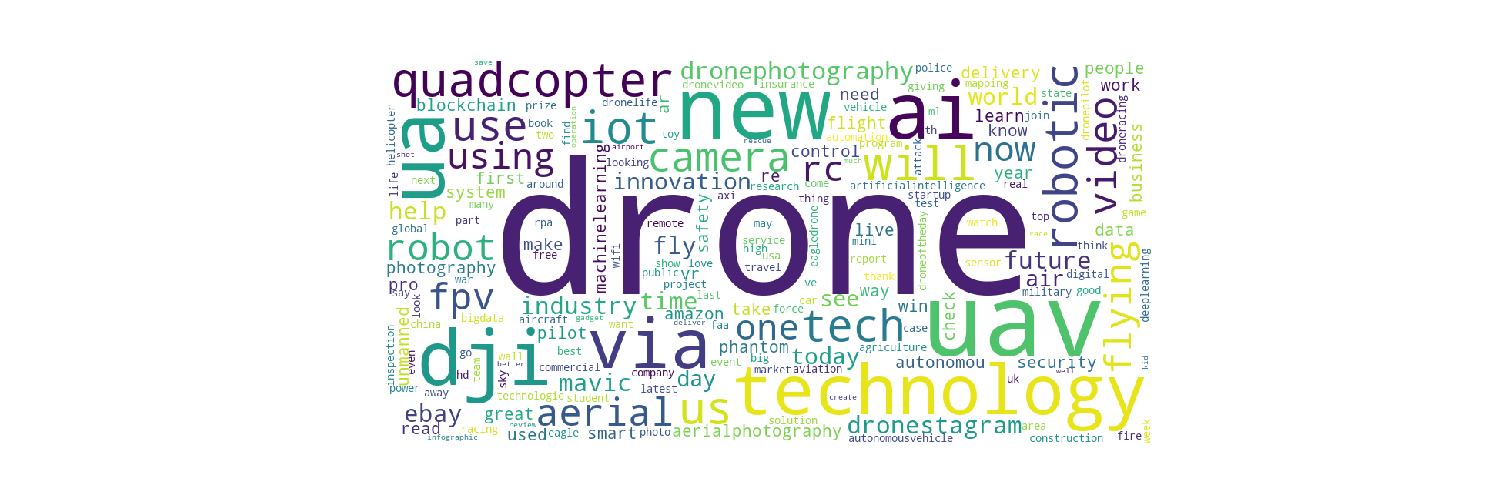

In [82]:
#top occuring words in tweets

getWordCloud(df.text[df.text!='nan'])

In [83]:
df.hashtags = df.hashtags.astype('str')

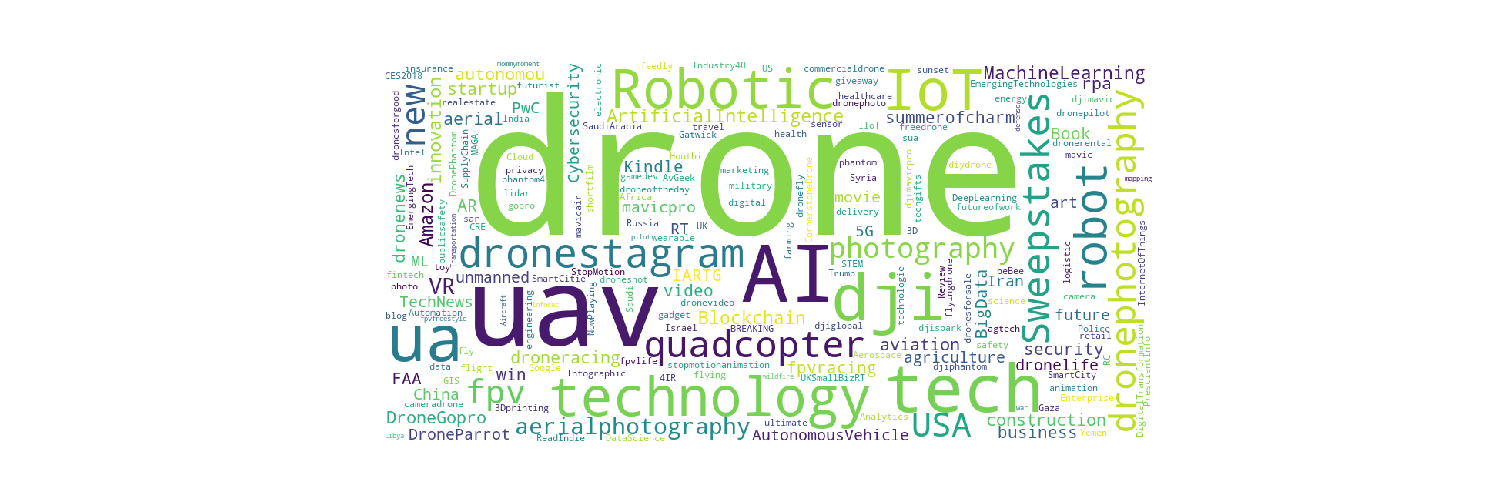

In [84]:
#Top occuring hashtags

getWordCloud(df.hashtags[df.hashtags!='nan'])

**Let us save our cleaned tweets for use further in the pipeline**

In [86]:
#df.to_csv('/dbfs/FileStore/tables/cleanedData.csv')